In [ ]:
import os
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from torch import nn, optim
from torch.utils.data import DataLoader, Dataset
from torchvision import models, transforms
from torchvision.datasets import ImageFolder
from sklearn.manifold import TSNE
from tqdm import tqdm  # For loading bar

from time import time
import joblib

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
print(os.listdir('./drive/MyDrive/Comp432_project/Data'))

['Colorectal Cancer']


In [ ]:


# import zipfile

# extraction_path = './drive/MyDrive/Data/'
# zip_file_path = './content/drive/MyDrive/Comp432_project/Data/Colorectal Cancer'
# # Create the extraction directory if it doesn't exist
# os.makedirs(extraction_path, exist_ok=True)


# # Unzip the file
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     zip_ref.extractall(extraction_path)



/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


Elapsed time for loading data and getting DataLoaders: 0.00 seconds
The device being used is cuda
Elapsed time for init of the model: 0.38 seconds


Epoch 1/50, Train Loss: 0.6647, Train Acc: 0.7631, Test Loss: 1.3024, Test Acc: 0.7611
Elapsed time for epoch 1: 949.59 seconds


Epoch 2/50, Train Loss: 0.3712, Train Acc: 0.8590, Test Loss: 0.4395, Test Acc: 0.8411
Elapsed time for epoch 2: 52.95 seconds


Epoch 3/50, Train Loss: 0.3128, Train Acc: 0.8833, Test Loss: 0.7698, Test Acc: 0.8244
Elapsed time for epoch 3: 51.55 seconds


Epoch 4/50, Train Loss: 0.2428, Train Acc: 0.9136, Test Loss: 2.1701, Test Acc: 0.8744
Elapsed time for epoch 4: 51.86 seconds


Epoch 5/50, Train Loss: 0.2609, Train Acc: 0.9067, Test Loss: 0.6294, Test Acc: 0.8367
Elapsed time for epoch 5: 52.29 seconds


Epoch 6/50, Train Loss: 0.1735, Train Acc: 0.9414, Test Loss: 0.1200, Test Acc: 0.9572
Elapsed time for epoch 6: 52.10 seconds


Epoch 7/50, Train Loss: 0.1085, Train Acc: 0.9643, Test Loss: 0.0963, Test Acc: 0.9667
Elapsed time for epoch 7: 52.26 seconds


Epoch 8/50, Train Loss: 0.0847, Train Acc: 0.9719, Test Loss: 0.0704, Test Acc: 0.9789
Elapsed time for epoch 8: 52.44 seconds


Epoch 9/50, Train Loss: 0.0908, Train Acc: 0.9652, Test Loss: 0.0840, Test Acc: 0.9722
Elapsed time for epoch 9: 52.61 seconds


Epoch 10/50, Train Loss: 0.0705, Train Acc: 0.9740, Test Loss: 0.1751, Test Acc: 0.9317
Elapsed time for epoch 10: 53.23 seconds


Epoch 11/50, Train Loss: 0.0703, Train Acc: 0.9738, Test Loss: 0.0604, Test Acc: 0.9789
Elapsed time for epoch 11: 54.03 seconds


Epoch 12/50, Train Loss: 0.0557, Train Acc: 0.9821, Test Loss: 0.0538, Test Acc: 0.9811
Elapsed time for epoch 12: 53.77 seconds


Epoch 13/50, Train Loss: 0.0553, Train Acc: 0.9805, Test Loss: 0.0532, Test Acc: 0.9817
Elapsed time for epoch 13: 52.98 seconds


Epoch 14/50, Train Loss: 0.0567, Train Acc: 0.9812, Test Loss: 0.0532, Test Acc: 0.9817
Elapsed time for epoch 14: 51.37 seconds


Epoch 15/50, Train Loss: 0.0556, Train Acc: 0.9814, Test Loss: 0.0558, Test Acc: 0.9806
Elapsed time for epoch 15: 52.11 seconds


Epoch 16/50, Train Loss: 0.0465, Train Acc: 0.9831, Test Loss: 0.0493, Test Acc: 0.9828
Elapsed time for epoch 16: 52.15 seconds


Epoch 17/50, Train Loss: 0.0563, Train Acc: 0.9826, Test Loss: 0.0543, Test Acc: 0.9822
Elapsed time for epoch 17: 53.32 seconds


Epoch 18/50, Train Loss: 0.0534, Train Acc: 0.9814, Test Loss: 0.0620, Test Acc: 0.9800
Elapsed time for epoch 18: 53.76 seconds


Epoch 19/50, Train Loss: 0.0557, Train Acc: 0.9814, Test Loss: 0.0477, Test Acc: 0.9844
Elapsed time for epoch 19: 54.26 seconds


Epoch 20/50, Train Loss: 0.0547, Train Acc: 0.9779, Test Loss: 0.0499, Test Acc: 0.9822
Elapsed time for epoch 20: 53.72 seconds


Epoch 21/50, Train Loss: 0.0467, Train Acc: 0.9845, Test Loss: 0.0485, Test Acc: 0.9839
Elapsed time for epoch 21: 53.08 seconds


Epoch 22/50, Train Loss: 0.0505, Train Acc: 0.9838, Test Loss: 0.0501, Test Acc: 0.9828
Elapsed time for epoch 22: 51.63 seconds


Epoch 23/50, Train Loss: 0.0550, Train Acc: 0.9817, Test Loss: 0.0448, Test Acc: 0.9856
Elapsed time for epoch 23: 52.15 seconds


Epoch 24/50, Train Loss: 0.0494, Train Acc: 0.9814, Test Loss: 0.0474, Test Acc: 0.9833
Elapsed time for epoch 24: 52.00 seconds


Epoch 25/50, Train Loss: 0.0521, Train Acc: 0.9829, Test Loss: 0.0485, Test Acc: 0.9822
Elapsed time for epoch 25: 51.85 seconds


Epoch 26/50, Train Loss: 0.0531, Train Acc: 0.9812, Test Loss: 0.0469, Test Acc: 0.9828
Elapsed time for epoch 26: 53.44 seconds


Epoch 27/50, Train Loss: 0.0533, Train Acc: 0.9800, Test Loss: 0.0485, Test Acc: 0.9856
Elapsed time for epoch 27: 54.23 seconds


Epoch 28/50, Train Loss: 0.0490, Train Acc: 0.9845, Test Loss: 0.0493, Test Acc: 0.9828
Elapsed time for epoch 28: 54.17 seconds


Epoch 29/50, Train Loss: 0.0620, Train Acc: 0.9790, Test Loss: 0.0467, Test Acc: 0.9833
Elapsed time for epoch 29: 53.56 seconds


Epoch 30/50, Train Loss: 0.0510, Train Acc: 0.9826, Test Loss: 0.0472, Test Acc: 0.9833
Elapsed time for epoch 30: 52.04 seconds


Epoch 31/50, Train Loss: 0.0417, Train Acc: 0.9879, Test Loss: 0.0480, Test Acc: 0.9861
Elapsed time for epoch 31: 52.00 seconds


Epoch 32/50, Train Loss: 0.0469, Train Acc: 0.9850, Test Loss: 0.0475, Test Acc: 0.9850
Elapsed time for epoch 32: 53.38 seconds


Epoch 33/50, Train Loss: 0.0553, Train Acc: 0.9793, Test Loss: 0.0449, Test Acc: 0.9850
Elapsed time for epoch 33: 53.32 seconds


Epoch 34/50, Train Loss: 0.0495, Train Acc: 0.9840, Test Loss: 0.0455, Test Acc: 0.9850
Elapsed time for epoch 34: 53.46 seconds


Epoch 35/50, Train Loss: 0.0496, Train Acc: 0.9805, Test Loss: 0.0473, Test Acc: 0.9839
Elapsed time for epoch 35: 53.79 seconds


Epoch 36/50, Train Loss: 0.0493, Train Acc: 0.9802, Test Loss: 0.0488, Test Acc: 0.9828
Elapsed time for epoch 36: 53.85 seconds


Epoch 37/50, Train Loss: 0.0496, Train Acc: 0.9838, Test Loss: 0.0484, Test Acc: 0.9833
Elapsed time for epoch 37: 53.55 seconds


Epoch 38/50, Train Loss: 0.0557, Train Acc: 0.9807, Test Loss: 0.0474, Test Acc: 0.9839
Elapsed time for epoch 38: 53.80 seconds


Epoch 39/50, Train Loss: 0.0498, Train Acc: 0.9840, Test Loss: 0.0483, Test Acc: 0.9844
Elapsed time for epoch 39: 53.76 seconds


Epoch 40/50, Train Loss: 0.0456, Train Acc: 0.9860, Test Loss: 0.0465, Test Acc: 0.9839
Elapsed time for epoch 40: 53.01 seconds


Epoch 41/50, Train Loss: 0.0533, Train Acc: 0.9829, Test Loss: 0.0494, Test Acc: 0.9833
Elapsed time for epoch 41: 53.83 seconds


Epoch 42/50, Train Loss: 0.0487, Train Acc: 0.9836, Test Loss: 0.0514, Test Acc: 0.9839
Elapsed time for epoch 42: 54.01 seconds


Epoch 43/50, Train Loss: 0.0443, Train Acc: 0.9845, Test Loss: 0.0505, Test Acc: 0.9833
Elapsed time for epoch 43: 54.05 seconds


Epoch 44/50, Train Loss: 0.0536, Train Acc: 0.9817, Test Loss: 0.0467, Test Acc: 0.9850
Elapsed time for epoch 44: 52.79 seconds


Epoch 45/50, Train Loss: 0.0524, Train Acc: 0.9819, Test Loss: 0.0509, Test Acc: 0.9817
Elapsed time for epoch 45: 51.68 seconds


Epoch 46/50, Train Loss: 0.0454, Train Acc: 0.9848, Test Loss: 0.0463, Test Acc: 0.9861
Elapsed time for epoch 46: 52.08 seconds


Epoch 47/50, Train Loss: 0.0513, Train Acc: 0.9824, Test Loss: 0.0510, Test Acc: 0.9833
Elapsed time for epoch 47: 52.41 seconds


Epoch 48/50, Train Loss: 0.0477, Train Acc: 0.9855, Test Loss: 0.0490, Test Acc: 0.9839
Elapsed time for epoch 48: 53.30 seconds


Epoch 49/50, Train Loss: 0.0506, Train Acc: 0.9848, Test Loss: 0.0477, Test Acc: 0.9839
Elapsed time for epoch 49: 53.90 seconds


Epoch 50/50, Train Loss: 0.0517, Train Acc: 0.9821, Test Loss: 0.0504, Test Acc: 0.9833
Elapsed time for epoch 50: 54.21 seconds
Elapsed time for training model 3546.71 seconds


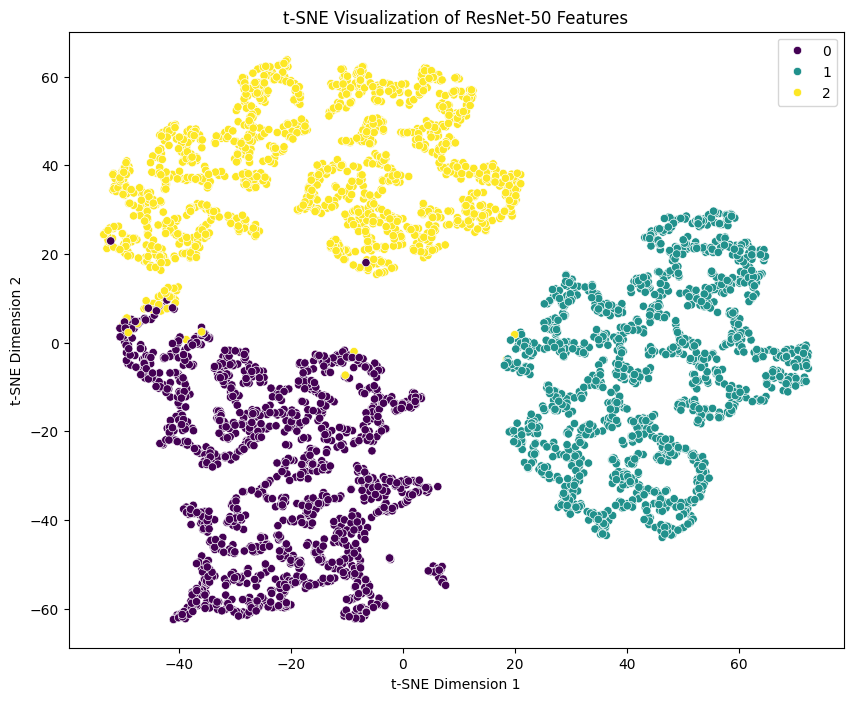

Elapsed time for program 3609.20


In [ ]:
if __name__ == '__main__':

  # Adding logs of time
  program_start_time = time()

  # Data Transformation - using ResNet and ImageNet Standards
  transform = transforms.Compose([
      transforms.Resize((224, 224)),  # ResNet requires 224x224 input
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # ImageNet normalization
  ])

  # Loading Dataset
  # data_dir = 'Data/Colorectal Cancer/' # for local hosting
  data_dir = '/content/drive/MyDrive/Comp432_project/Data/Colorectal Cancer' # for googla colab path
  dataset = ImageFolder(root=data_dir, transform=transform)

  # Splitting the dataset into training and testing sets (70/30 split)
  train_size = int(0.7 * len(dataset))
  test_size = len(dataset) - train_size
  train_dataset, test_dataset = torch.utils.data.random_split(dataset, [train_size, test_size])

  # Hyperparameter
  batch_size = 32

  # Creating data loaders
  loader_start_time = time()
  train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4)
  test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False, num_workers=4)
  print(f'Elapsed time for loading data and getting DataLoaders: {(time() - loader_start_time):.2f} seconds')

  # Model Setup
  device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
  print(f'The device being used is {device}')

  init_model_start_time = time()
  # Adjusting for the deprecation warning

  # model = models.resnet50(weights=models.ResNet50_Weights.DEFAULT) # uses pretrained weights
  # model = models.resnet50(pretrained=False) # does not use pretrained weights
  model = models.resnet50(weights=None) # This is better practice then pretrained=False
  print(f'Elapsed time for init of the model: {(time() - init_model_start_time):.2f} seconds')

  # Modifying the final layer to match the number of classes
  num_classes = len(dataset.classes)  # Number of classes in the dataset --> 3 classes
  model.fc = nn.Linear(model.fc.in_features, num_classes)
  model.to(device)

  # Hyperparameters
  num_epochs = 50
  lr = 0.001

  # Loss Function and Optimizer
  criterion = nn.CrossEntropyLoss()
  optimizer = optim.Adam(model.parameters(), lr=lr)

  # Adding the learning rate scheduler
  scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)  # Reduces LR by 0.1 every 5 epochs

  # Training
  train_acc, test_acc, train_loss, test_loss = [], [], [], []

  training_start_time = time()

  for epoch in range(num_epochs):
    epoch_start_time = time()
    # Training phase
    model.train()
    running_loss, running_corrects = 0.0, 0
    # Adding tqdm loading bar
    for inputs, labels in tqdm(train_loader, desc=f"Training Epoch {epoch+1}/{num_epochs}", leave=False):
      inputs, labels = inputs.to(device), labels.to(device)

      optimizer.zero_grad()
      outputs = model(inputs)
      loss = criterion(outputs, labels)
      loss.backward()
      optimizer.step()

      # Update training metrics
      _, preds = torch.max(outputs, 1)
      running_loss += loss.item() * inputs.size(0)
      running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = running_corrects.double() / len(train_dataset)
    train_loss.append(epoch_loss)
    train_acc.append(epoch_acc.item())

    # Testing phase
    model.eval()
    running_loss, running_corrects = 0.0, 0
    with torch.no_grad():
      for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Update testing metrics
        _, preds = torch.max(outputs, 1)
        running_loss += loss.item() * inputs.size(0)
        running_corrects += torch.sum(preds == labels.data)

    epoch_loss = running_loss / len(test_dataset)
    epoch_acc = running_corrects.double() / len(test_dataset)
    test_loss.append(epoch_loss)
    test_acc.append(epoch_acc.item())

    # Step the scheduler
    scheduler.step()

    print(f"Epoch {epoch+1}/{num_epochs}, "
          f"Train Loss: {train_loss[-1]:.4f}, Train Acc: {train_acc[-1]:.4f}, "
          f"Test Loss: {test_loss[-1]:.4f}, Test Acc: {test_acc[-1]:.4f}")
    print(f'Elapsed time for epoch {epoch+1}: {(time() - epoch_start_time):.2f} seconds')

  print(f'Elapsed time for training model {(time() - training_start_time):.2f} seconds')

  # Feature Extraction for t-SNE
  features, labels_list = [], []
  model.eval()
  with torch.no_grad():
    for inputs, labels in train_loader:
      inputs = inputs.to(device)
      outputs = model(inputs)

      # Extract features before the final layer
      features.append(outputs.cpu())
      labels_list.append(labels)

  features = torch.cat(features).numpy()
  labels_list = torch.cat(labels_list).numpy()

  # Applying t-SNE
  tsne = TSNE(n_components=2, random_state=42)
  features_2d = tsne.fit_transform(features)

  # Plotting t-SNE Results
  plt.figure(figsize=(10, 8))
  sns.scatterplot(
      x=features_2d[:, 0], y=features_2d[:, 1], hue=labels_list, palette='viridis', legend='full'
  )
  plt.title("t-SNE Visualization of ResNet-50 Features")
  plt.xlabel("t-SNE Dimension 1")
  plt.ylabel("t-SNE Dimension 2")
  plt.show()


  print(f'Elapsed time for program {(time() - program_start_time):.2f}')

In [ ]:
# Create the directory if it doesn't exist
os.makedirs('task_1', exist_ok=True)

# Save the model
model_save_path = 'task_1/resnet50_colorectal.pth'
torch.save(model.state_dict(), model_save_path)

print(f"Model saved to {model_save_path}")


Model saved to task_1/resnet50_colorectal.pth


In [ ]:
print(os.listdir())

['.config', 'drive', 'task_1', 'sample_data']
